In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

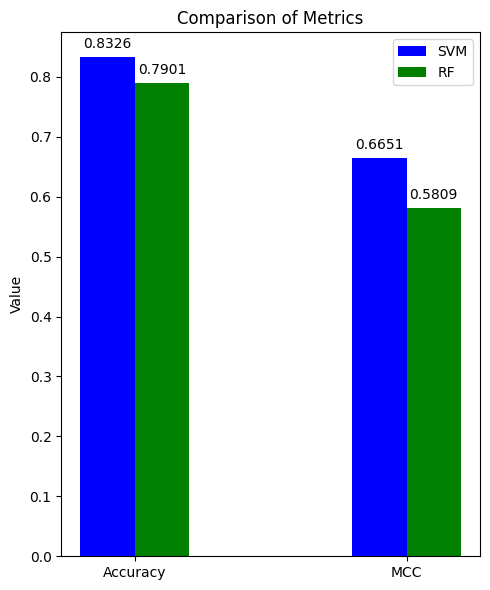

In [18]:

df1 = pd.read_csv('./SVM/top10_models_by_mcc.csv')
df2 = pd.read_csv('./RF/top10_rf_models_by_mcc.csv')

config_str1 = df1['config_str'][0]
config_str2 = df2['config_str'][0]

accuracy1 = df1['accuracy'][0]
accuracy2 = df2['accuracy'][0]

mcc1 = df1['mcc'][0]
mcc2 = df2['mcc'][0]


metrics = [accuracy1, mcc1, accuracy2, mcc2]
labels = ['Accuracy', 'MCC', 'Accuracy', 'MCC']
config_labels = [config_str1, config_str2] 

fig, ax = plt.subplots(figsize=(5, 6))  

bar_width = 0.2
bar1_pos = [i - bar_width/2 for i in range(2)]
bar2_pos = [i + bar_width/2 for i in range(2)]

ax.bar(bar1_pos, [accuracy1, mcc1], width=bar_width, label='SVM', color='blue')
ax.bar(bar2_pos, [accuracy2, mcc2], width=bar_width, label='RF', color='green')

ax.set_xticks(range(2))  
ax.set_xticklabels(labels[:2])

ax.set_ylabel('Value')
ax.set_title('Comparison of Metrics')
ax.legend()

for i, v in enumerate([accuracy1, mcc1]):
    ax.text(i - bar_width/2, v + 0.01, f"{v:.4f}", ha='center', va='bottom')
for i, v in enumerate([accuracy2, mcc2]):
    ax.text(i + bar_width/2, v + 0.01, f"{v:.4f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()
